In [ ]:
import os
import csv
import glob
import pandas as pd
#csv 폴더 경로
path='/content/drive/My Drive/Colab Notebooks/security/data'
#unlabeled data(Dos)->all abnormal data
fullpath=os.path.join(path, 'DoS.csv')
# Data Preprocessing
dataset = pd.read_csv(fullpath)
#print(dataset)
cols=["Flow Duration","Flow Pkts/s","Flow IAT Mean","Flow IAT Max","Flow IAT Min","Fwd Header Len","Bwd Header Len","Bwd Pkts/s","Init Fwd Win Byts"]
transactions=[]

for idx in range(len(dataset)):
  transaction=[]
  transaction.append(str(dataset.loc[idx]['Dst Port']))
  for col in cols:
    if dataset.loc[idx][col]<100:
      transaction.append("L_"+col)
    elif dataset.loc[idx][col]<1000:
      transaction.append("M_"+col)
    else:
      transaction.append("H_"+col)
  if dataset.loc[idx]['Fwd Seg Size Min']<=20:
    transaction.append("L_FSSM")
  elif dataset.loc[idx]['Fwd Seg Size Min']>20:
    transaction.append("H_FSSM")
  transactions.append(transaction)

In [ ]:
#put the rules
rules=[['H_Flow Duration','H_Flow IAT Max','L_FSSM']]
predicted=[]
for idx in range(len(transactions)):
  predict=0
  for rule in rules:
    s1=set(rule)
    s2=set(transactions[idx])
    #정상 rule 다 갖고 있으면 정상으로 판단=1
    if s1 ==s1.intersection(s2):
      predict=1
  predicted.append(predict)

#print(len(predicted))
print(predicted)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

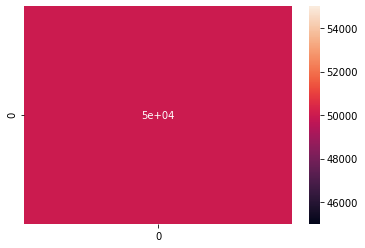

In [ ]:
#abnormal=0/normal=1
answer=[0]*len(dataset)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_mat=confusion_matrix(answer,predicted)
import seaborn as sns
sns.heatmap(confusion_mat, annot=True)